In [30]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
model =  LogisticRegression()

## Employee retaintion analysis

In [31]:
dfh = pd.read_csv("C:/Users/Admin.DESKTOP-Q9CVR13/Desktop/DataSet imarticus/PYTHON/Day 8 Logistic Regression/HR_comma_sep.csv")
dfh.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [32]:
left = dfh[dfh.left == 1]
left.shape

(3571, 10)

In [33]:
retained = dfh[dfh.left == 0]
retained.shape

(11428, 10)

In [34]:
dfh.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<AxesSubplot:xlabel='salary'>

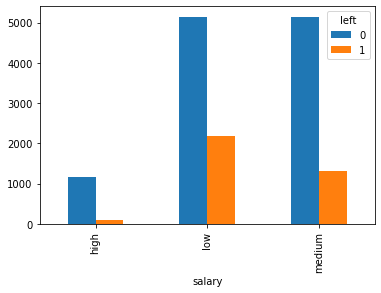

In [35]:
pd.crosstab(dfh.salary,dfh.left).plot(kind='bar')

<AxesSubplot:xlabel='Department'>

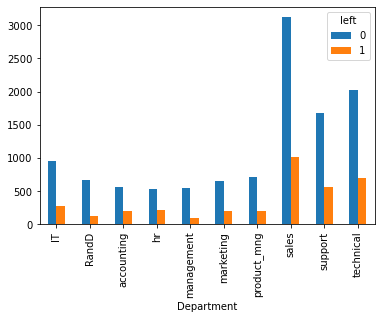

In [36]:
pd.crosstab(dfh.Department,dfh.left).plot(kind='bar')

In [37]:
dfh.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [38]:
subdf = dfh[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [39]:
salary_dum = pd.get_dummies(subdf,prefix='salary')

In [40]:
salary_dum

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0
...,...,...,...,...,...,...
14994,0.40,151,0,0,1,0
14995,0.37,160,0,0,1,0
14996,0.37,143,0,0,1,0
14997,0.11,280,0,0,1,0


In [41]:
 X =salary_dum

In [42]:
df_with_dummies = pd.concat([subdf,salary_dum],axis='columns')

In [43]:
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0.38,157,0,0,1,0
1,0.80,262,0,medium,0.80,262,0,0,0,1
2,0.11,272,0,medium,0.11,272,0,0,0,1
3,0.72,223,0,low,0.72,223,0,0,1,0
4,0.37,159,0,low,0.37,159,0,0,1,0


In [44]:
X

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0
...,...,...,...,...,...,...
14994,0.40,151,0,0,1,0
14995,0.37,160,0,0,1,0
14996,0.37,143,0,0,1,0
14997,0.11,280,0,0,1,0


In [45]:
Y = dfh.left
Y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [46]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.7)

In [47]:
print("Og",dfh.shape,"\n Train",X_train.shape,"\n test",X_test.shape )

Og (14999, 10) 
 Train (10499, 6) 
 test (4500, 6)


In [48]:
model.fit(X_train,Y_train)

LogisticRegression()

In [50]:
y_pred =model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Accuracy model

In [52]:
model.score(X_train,Y_train)

0.7824554719497095

In [54]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(Y_test,y_pred)
cf_matrix

array([[3189,  207],
       [ 826,  278]], dtype=int64)

In [55]:
cf_matrix.flatten

<function ndarray.flatten>

<AxesSubplot:>

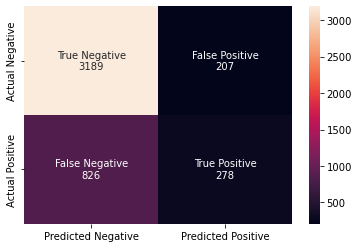

In [56]:
import numpy as np
import seaborn as sns
# preparing the labels
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
values = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
annotations = [f'{v1}\n{v2}' for v1, v2 in zip(labels, values)]
annotations = np.asarray(annotations).reshape(2,2)
axylabels = ['Actual Negative', 'Actual Positive']
axxlabels = ['Predicted Negative', 'Predicted Positive']

# plotting the heatmap
sns.heatmap(cf_matrix, annot=annotations, fmt='', xticklabels=axxlabels, yticklabels=axylabels)

In [58]:
tn = cf_matrix.flatten()[0] # true negative
fp = cf_matrix.flatten()[1] # false positive
fn = cf_matrix.flatten()[2] # false negative
tp = cf_matrix.flatten()[3] # true positive

acc = ((tp+tn)/(tp+fn+tn+fp))*100 # accuracy
tpr = (tp/(tp+fn))*100 # true positive rate
tnr = (tn/(tn+fp))*100 # true negative rate

print(str.format('Accuracy: {:.2f}%', acc))
print(str.format('True Positive Rate: {:.2f}%', tpr))
print(str.format('True Negative Rate: {:.2f}%', tnr))

Accuracy: 77.04%
True Positive Rate: 25.18%
True Negative Rate: 93.90%


In [ ]:
from sklearn.metrics import accuracy_score


accuracy_score()

## ROC and AUC curve

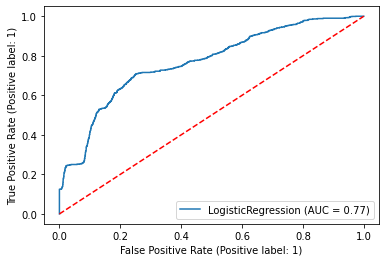

In [61]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model, X_test,Y_test)
plt.plot([0,1],[0,1],'r--')

# blue curve is towards 1 model is good

In [ ]:
import statsmodels.api as sm